# Explore here

In [2]:
# Your code here
#separar las imagenes de perros y gatos del conjunto train
import shutil
import os
def separar_imagenes(ruta_carpeta):
    archivos = os.listdir(ruta_carpeta)
    for archivo in archivos:
        if archivo.startswith("dog"):
            destino = os.path.join(ruta_carpeta, "dog")
        elif archivo.startswith("cat"):
            destino = os.path.join(ruta_carpeta, "cat")
        else:
            continue
        if not os.path.exists(destino):
            os.makedirs(destino)
        shutil.move(os.path.join(ruta_carpeta, archivo),destino)
separar_imagenes("../data/raw/train/")

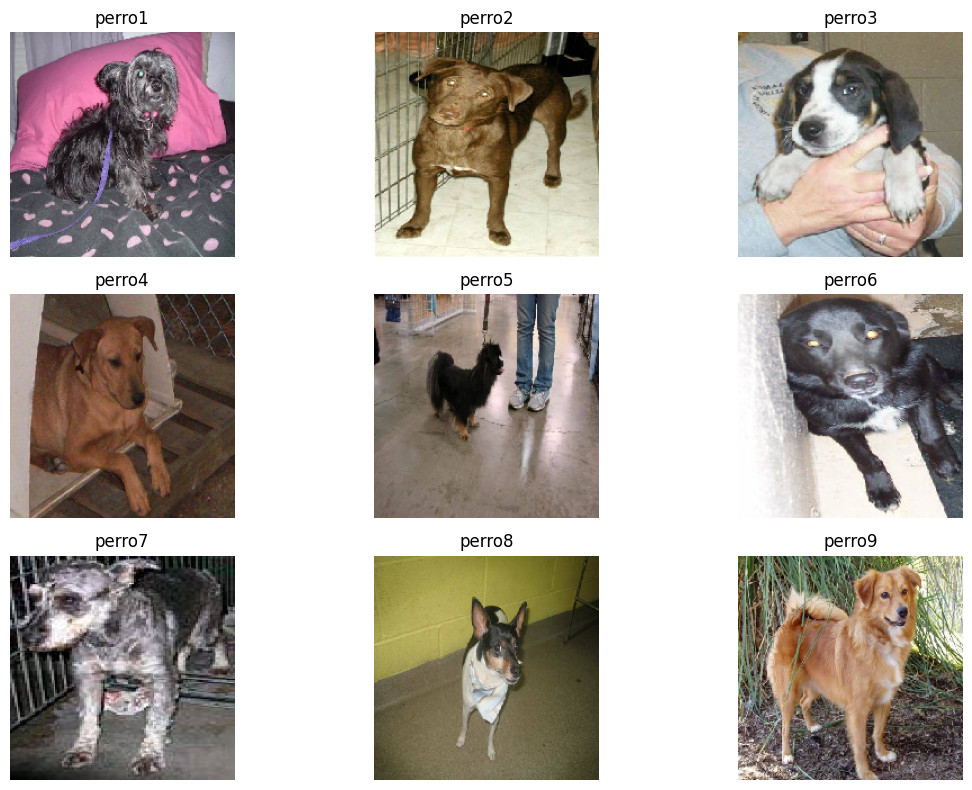

In [4]:
#guardar las primeras 9 imagenes, en 200x200
#graficarlas
from keras.preprocessing import image
import matplotlib.pyplot as plt

data_dir = "../data/raw/train/"
subfolder_dogs = os.path.join(data_dir, "dog")
imagenes_perros = os.listdir(subfolder_dogs)
dog_images = []
for i in range(9):
    ruta_imagen = os.path.join(subfolder_dogs, imagenes_perros[i])
    img = image.load_img(ruta_imagen, target_size=(200,200))

#esta imagen la volveré un array para normalizar los valores de los pixeles entre 0 y 1.
#Las imagenes a colores tienen una representacion entre 0 y 255 por pixel
#entonces debo dividirla por 255

    img_array= image.img_to_array(img)
    img_array = img_array / 255.0
    dog_images.append(img_array)

plt.figure(figsize=(12,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(dog_images[i])
    plt.axis("off")
    plt.title("perro"+ str(i+1))

plt.tight_layout()
plt.show()

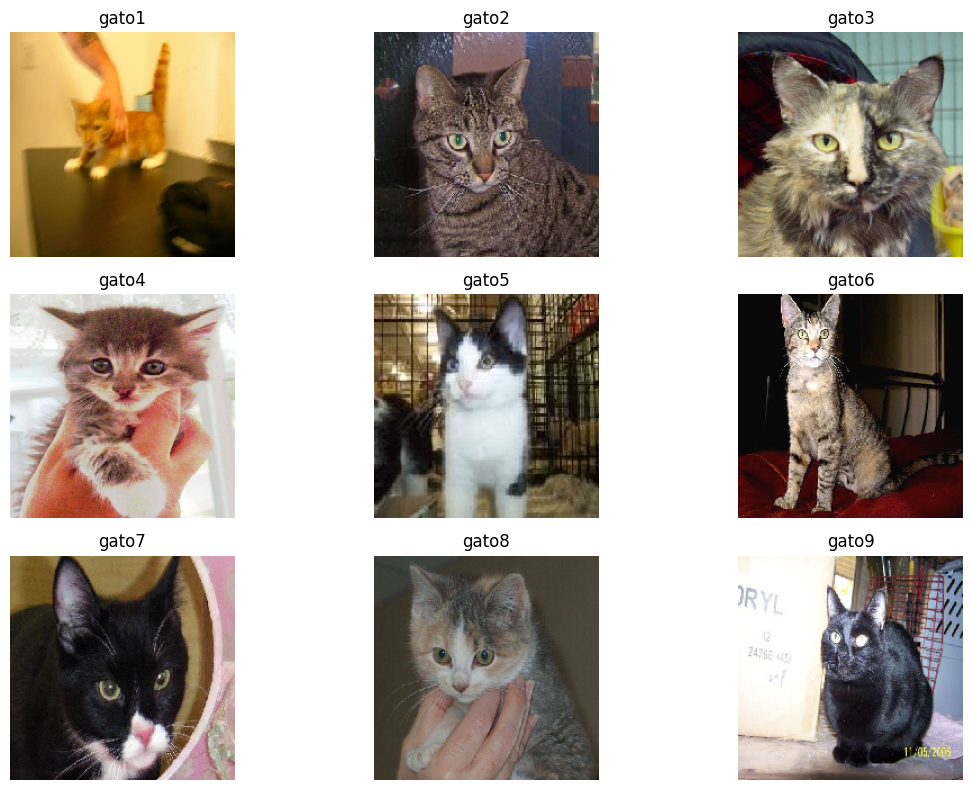

In [5]:
#hacer lo mismo con los gatos
data_dir = "../data/raw/train/"
subfolder_cats = os.path.join(data_dir, "cat")
imagenes_gatos = os.listdir(subfolder_cats)
cat_images = []
for i in range(9):
    ruta_imagen = os.path.join(subfolder_cats, imagenes_gatos[i])
    img = image.load_img(ruta_imagen, target_size=(200,200))
#esta imagen la volveré un array para normalizar los valores de los pixeles entre 0 y 1.
#Las imagenes a colores tienen una representacion entre 0 y 255 por pixel
#entonces debo dividirla por 255
    img_array= image.img_to_array(img)
    img_array = img_array / 255.0
    cat_images.append(img_array)
plt.figure(figsize=(12,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(cat_images[i])
    plt.axis("off")
    plt.title("gato"+ str(i+1))
plt.tight_layout()
plt.show()

In [6]:
#cargar las imágenes progresivamente usando la clase keras imageDataGenerator
#  y la funcon Flow_from_directory().
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "../data/raw/train/"
test_dir = "../data/raw/"
image_size = (200,200)
datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes=["dog","cat"]
)
test_data = datagentrain.flow_from_directory(
    test_dir,
    target_size = image_size,
    classes=["test1"]
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [7]:
#ya cargadas las imagenes. entrenar el modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
#definir el modelo como secuencial
model = Sequential()
#en la primera capa, convolucional 2d pasar shape, en este caso 200x200 porque es el tamaño de la imagen
#con 3 tipos de colores, 64 filtros, kernel size de 3x3 y activacion relu.
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
#otra capa convolucional 2d que se conecta con la anterior. Las capas convolucionales nos indican qué pixeles son
#mas importantes para decidir por una clase u otra.
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
#las capas maxpool 2d busca volver a tener y refinar las imagenes.
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
#más capas convolucionales, esta vez con más filtros seguidas de capas maxpool 2d para volver a tener y refinar las imagenes
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
#hasta esta parte, es preprocesamiento de imagen.
#aplanar todo para pasar por dos capas de neuronas de 4096 neuronas cada una, para poder hacer las predicciones.
#desde aqui se define la red.
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
#capa final (de salida) de clasificacion con activacion softmax para indicar la probabilidad de que sea perro o gato.
model.add(Dense(units = 2, activation = "softmax"))

c:\Users\grazi\anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#definida la red, compilar
#adam es la version del optimizador que usa gradiente descendente.
#por motivos de tiempo usaremos un learning_rate de 0.001 en vez de 0.0001
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [9]:
#entrenar el modelo. para un modelo con buenos resultados, deberían ser al menos 10 epochs, por motivos de tiempo es solo 1 en el ejercicio.
model.fit(train_data, epochs=1
          
          
          )

c:\Users\grazi\anaconda3\envs\deeplearning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 64549s 83s/step - accuracy: 0.5063 - loss: 72.2016


In [1]:
# guardar el modelo
model.save("../models/vgg16.h5")

NameError: name 'model' is not defined

In [10]:
# optimizacion usando early stopping.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.keras", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False, mode="auto", save_freq="epoch")
early = EarlyStopping(monitor="val_accuracy", min_delta=0, patience=3, verbose=1, mode="auto")
history = model.fit(train_data, epochs=3, validation_data=test_data, callbacks =[checkpoint,early], steps_per_epoch=100, validation_steps=10)

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.4935 - loss: 0.6936 

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 2)